In [7]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Histograms

In [8]:
netflix = Table.read_table('netflix.csv')

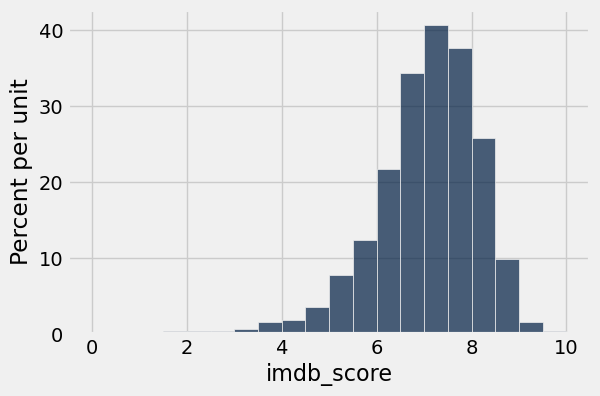

In [9]:
my_bins = np.arange(0,10.5, 0.5)
netflix.where('type', 'SHOW').hist('imdb_score', bins = my_bins)

In [10]:
# Top 200 highest grossing movies up to 2017
top_movies = Table.read_table('https://raw.githubusercontent.com/eysalee/webpage/refs/heads/main/courses/f25/top_movies_2017.csv')

In [11]:
ages = 2025 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [12]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,86
Star Wars,Fox,460998007,1583483200,1977,48
The Sound of Music,Fox,158671368,1266072700,1965,60
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,43
Titanic,Paramount,658672302,1204368000,1997,28
The Ten Commandments,Paramount,65500000,1164590000,1956,69
Jaws,Universal,260000000,1138620700,1975,50
Doctor Zhivago,MGM,111721910,1103564200,1965,60
The Exorcist,Warner Brothers,232906145,983226600,1973,52
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,88


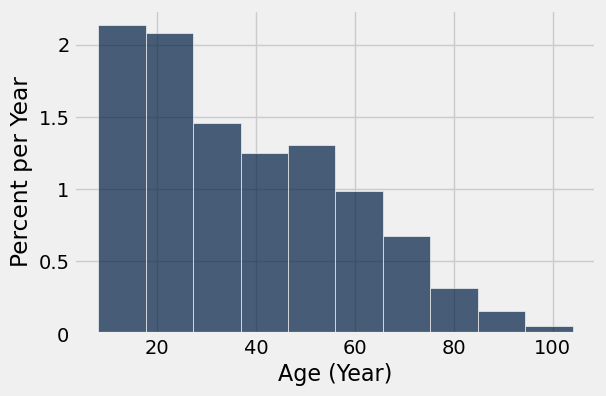

In [13]:
# Not specifying bins will give default values
top_movies.hist('Age', unit='Year')

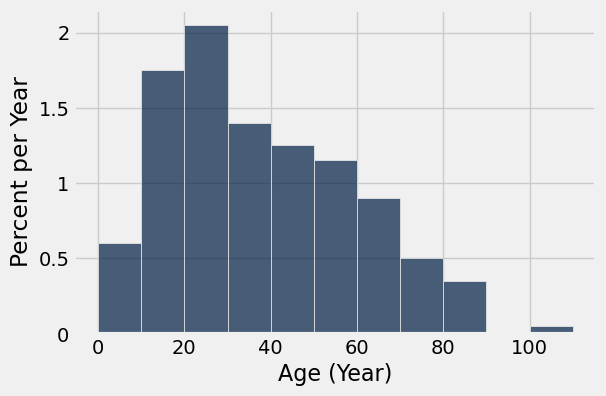

In [14]:
# We can specify equally sized bins
equal_bins = np.arange(0, 111, 10)
top_movies.hist('Age', bins=equal_bins, unit='Year')

With the new bins, you can see an increase from 0-10 to 10-20.

You can also see there are no top movies from 90-100

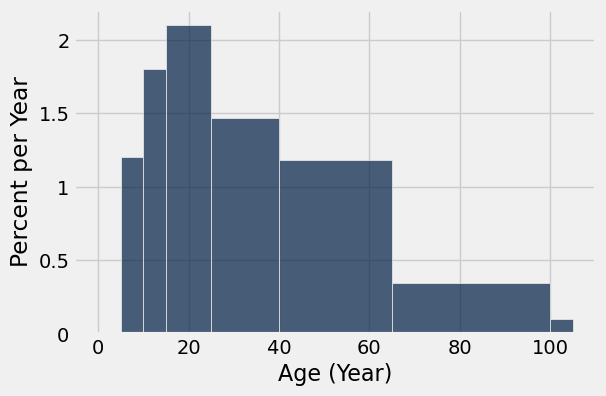

In [15]:
# Let's do unequal bins
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100, 105)
top_movies.hist('Age',bins=my_bins,unit='Year')

### Question: What percent of the top movies are from 40-65 years ago?

In [16]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,12
10,18
15,42
25,44
40,59
65,24
100,1
105,0


In [17]:
bin_percents = 100*binned_data.column('Age count')/sum(binned_data.column('Age count'))
binned_data = binned_data.with_column('Percent', bin_percents)
binned_data

bin,Age count,Percent
0,0,0
5,12,6
10,18,9
15,42,21
25,44,22
40,59,29.5
65,24,12
100,1,0.5
105,0,0


### Question: What is the height of the 40-65 bin?

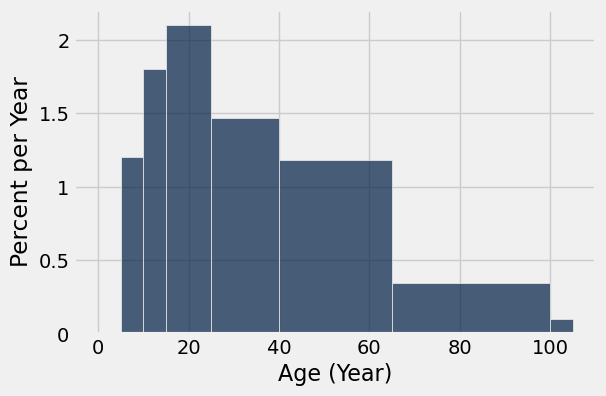

In [18]:
top_movies.hist('Age', bins=my_bins,unit='Year')

In [19]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)
percent

29.5

In [20]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40

In [21]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

1.18

This height represents the percent per year (the % of top movies that came out within this age range)

## Weather Data Demo

Let's load some weather data.

There's a lot of extra data in here, so let's go ahead and remove it. We're going to be interested in whether or not there was rain or snow and not specifically the amount, so let's also add in an extra column that says if there were rainy or snowy days.

In [22]:
weather = Table.read_table("https://raw.githubusercontent.com/eysalee/webpage/refs/heads/main/courses/f25/nyc_temperature_2019.csv")

# Cleaning the data, don't worry about this for now
# We'll go into this later
def add_condition(precipitation, new_snow):
    if new_snow > 0:
        return 'snowy'
    elif precipitation > 0:
        return 'rainy'
    else:
        return ''
    
# Our function takes in two arguments, 
# so we specify the two columns that the data should come from
conditions_array = weather.apply(add_condition, 'precipitation', 'new_snow')

weather = weather.with_columns('condition', conditions_array)

# Let's remove some columns we don't care about
weather = weather.drop('departure', 'HDD', 'CDD', 'precipitation', 'new_snow', 'snow_depth')
weather

date,tmax,tmin,tavg,condition
1/1/19,60,40,50,rainy
2/1/19,41,35,38,
3/1/19,45,39,42,
4/1/19,47,37,42,
5/1/19,47,42,44.5,rainy
6/1/19,49,32,40.5,
7/1/19,35,26,30.5,
8/1/19,47,35,41,rainy
9/1/19,46,35,40.5,rainy
10/1/19,35,30,32.5,


### Question: Do days with hotter highs also tend to have hotter lows?

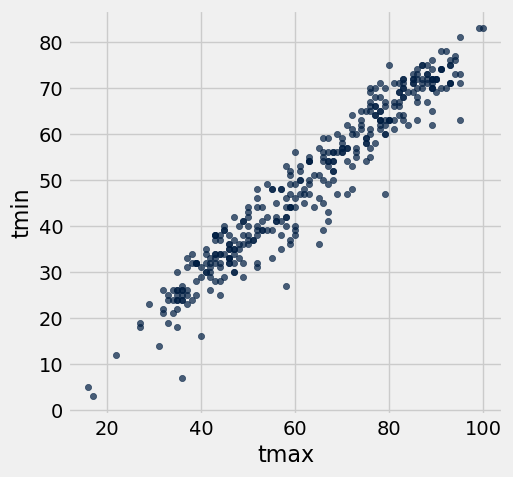

In [23]:
# Yes, the relationship is pretty linear
weather.scatter('tmax', 'tmin')

### Question: How do the number of rainy days compare with the number of snowy days?

In [24]:
weather_conditions = weather.group('condition').take(1,2)
weather_conditions

condition,count
rainy,124
snowy,15


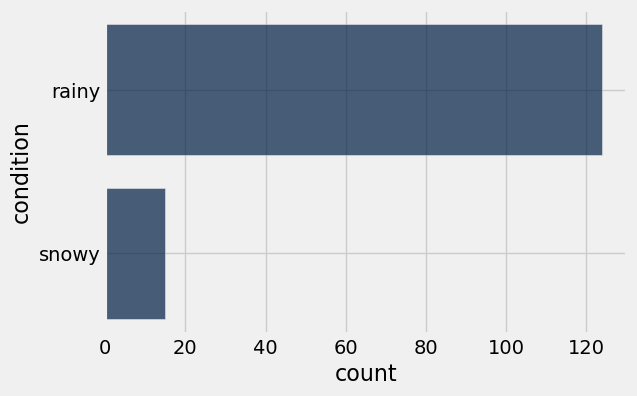

In [25]:
weather_conditions.barh('condition')

### Question: How do the average tavg compare between rainy days, snowy days, and days without any precipitation?

In [26]:
condition_avgs = weather.group('condition', np.average)
condition_avgs

condition,date average,tmax average,tmin average,tavg average
,,63.323,49.4292,56.3761
rainy,,65.8548,52.3306,59.0927
snowy,,38.6667,27.4667,33.0667


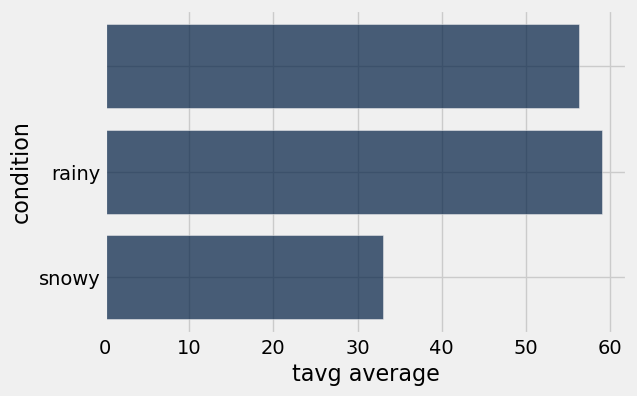

In [27]:
condition_avgs.barh('condition', 'tavg average')

### Question: What percent of days have a high of at least 75 degrees?

In [28]:
min(weather.column('tmax')), max(weather.column('tmax'))

(16, 100)

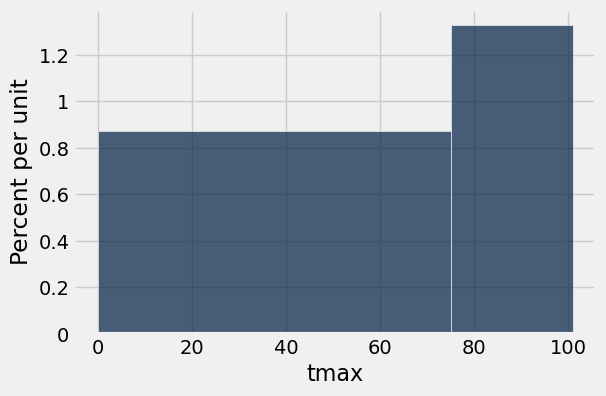

In [29]:
my_bins = make_array(0, 75, 101)
weather.hist('tmax', bins = my_bins)

In [30]:
binned_data = weather.bin('tmax', bins = my_bins)
binned_data

bin,tmax count
0,239
75,126
101,0


In [33]:
binned_percents = binned_data.column('tmax count') / sum(binned_data.column('tmax count'))
binned_percents

array([ 0.65479452,  0.34520548,  0.        ])

In [34]:
binned_data_with_percents = binned_data.with_column('Percent', binned_percents)
binned_data_with_percents.set_format('Percent', PercentFormatter)

bin,tmax count,Percent
0,239,65.48%
75,126,34.52%
101,0,0.00%


## Census Demo

We'll be looking at US age and sex census data from 2020 to 2024 (https://www2.census.gov/programs-surveys/popest/datasets/2020-2024/national/asrh/nc-est2024-agesex-res.csv).

Some notes about the formatting of this data:
- "Sex" are represented by numbers 0, 1, 2
    * 0 refers to "Male and Female"
    * 1 is "Male"
    * 2 is "Female"
- The ESTIMATESBASE column refers to the estimated population in April 1, 2020
- POPESTIMATE columns refer to the estimated populations as of July 1 of each year
- Ages go up to 100
- Age 999 row represents the totals of the column (by "Sex")

In [35]:
census_url = "https://raw.githubusercontent.com/eysalee/webpage/refs/heads/main/courses/f25/nc-est2024-agesex-res.csv"
# census_filename = 'nc-est2024-agesex-res.csv'
census = Table.read_table(census_url)
census

SEX,AGE,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,POPESTIMATE2024
0,0,3735085,3703341,3572166,3680587,3653650,3615598
0,1,3777552,3764698,3708865,3602662,3720079,3701824
0,2,3873736,3854287,3771032,3738864,3642354,3768012
0,3,3966696,3933667,3860489,3800263,3778530,3690129
0,4,4049711,4038296,3939654,3888578,3837784,3823751
0,5,4078129,4074896,4044039,3966181,3924020,3880536
0,6,4048712,4063071,4080393,4069107,4000239,3965148
0,7,4054232,4050053,4068326,4104251,4101661,4039527
0,8,4073479,4057336,4055184,4091521,4135609,4139497
0,9,4114609,4102425,4062356,4077757,4122524,4172964


### Table Formatting

In [36]:
# Let's start by getting rid of the ESTIMATESBASE2020 column
census = census.drop('ESTIMATESBASE2020')

In [37]:
# Let's use .relabel to rename the columns
census = census.relabel('POPESTIMATE2020', '2020').relabel('POPESTIMATE2021', '2021').relabel('POPESTIMATE2022', '2022').relabel('POPESTIMATE2023', '2023').relabel('POPESTIMATE2024', '2024')
census

SEX,AGE,2020,2021,2022,2023,2024
0,0,3703341,3572166,3680587,3653650,3615598
0,1,3764698,3708865,3602662,3720079,3701824
0,2,3854287,3771032,3738864,3642354,3768012
0,3,3933667,3860489,3800263,3778530,3690129
0,4,4038296,3939654,3888578,3837784,3823751
0,5,4074896,4044039,3966181,3924020,3880536
0,6,4063071,4080393,4069107,4000239,3965148
0,7,4050053,4068326,4104251,4101661,4039527
0,8,4057336,4055184,4091521,4135609,4139497
0,9,4102425,4062356,4077757,4122524,4172964


We can use the `.set_format` function to format how numbers are displayed. This is similar to how in a spreadsheet you may set data to be displayed as a number, percentage, date, or currency.

We'll keep it simple with `NumberFormatter` and `PercentFormatter` and not touch other types of formats for now.

In [38]:
census.set_format('2020', NumberFormatter)

SEX,AGE,2020,2021,2022,2023,2024
0,0,"3,703,341",3572166,3680587,3653650,3615598
0,1,"3,764,698",3708865,3602662,3720079,3701824
0,2,"3,854,287",3771032,3738864,3642354,3768012
0,3,"3,933,667",3860489,3800263,3778530,3690129
0,4,"4,038,296",3939654,3888578,3837784,3823751
0,5,"4,074,896",4044039,3966181,3924020,3880536
0,6,"4,063,071",4080393,4069107,4000239,3965148
0,7,"4,050,053",4068326,4104251,4101661,4039527
0,8,"4,057,336",4055184,4091521,4135609,4139497
0,9,"4,102,425",4062356,4077757,4122524,4172964


In [39]:
census.set_format('2021', NumberFormatter)

SEX,AGE,2020,2021,2022,2023,2024
0,0,"3,703,341","3,572,166",3680587,3653650,3615598
0,1,"3,764,698","3,708,865",3602662,3720079,3701824
0,2,"3,854,287","3,771,032",3738864,3642354,3768012
0,3,"3,933,667","3,860,489",3800263,3778530,3690129
0,4,"4,038,296","3,939,654",3888578,3837784,3823751
0,5,"4,074,896","4,044,039",3966181,3924020,3880536
0,6,"4,063,071","4,080,393",4069107,4000239,3965148
0,7,"4,050,053","4,068,326",4104251,4101661,4039527
0,8,"4,057,336","4,055,184",4091521,4135609,4139497
0,9,"4,102,425","4,062,356",4077757,4122524,4172964


In [40]:
# Notice that this does not change the underlying data
# We've only modified how it's formatted in the Table
census.column('2020').item(0)

3703341

In [41]:
# We can also give it multiple columns to format
census.set_format(['2022', '2023', '2024'], NumberFormatter)

SEX,AGE,2020,2021,2022,2023,2024
0,0,"3,703,341","3,572,166","3,680,587","3,653,650","3,615,598"
0,1,"3,764,698","3,708,865","3,602,662","3,720,079","3,701,824"
0,2,"3,854,287","3,771,032","3,738,864","3,642,354","3,768,012"
0,3,"3,933,667","3,860,489","3,800,263","3,778,530","3,690,129"
0,4,"4,038,296","3,939,654","3,888,578","3,837,784","3,823,751"
0,5,"4,074,896","4,044,039","3,966,181","3,924,020","3,880,536"
0,6,"4,063,071","4,080,393","4,069,107","4,000,239","3,965,148"
0,7,"4,050,053","4,068,326","4,104,251","4,101,661","4,039,527"
0,8,"4,057,336","4,055,184","4,091,521","4,135,609","4,139,497"
0,9,"4,102,425","4,062,356","4,077,757","4,122,524","4,172,964"


### Column Arithmetic

Let's compute the change in total population between 2020 and 2024. 

Then let's take the difference between the values in the 2024 column (new pop) and subtract from the values in the 2020 column (initial pop).

In [42]:
pop2024 = census.column('2024')
pop2020 = census.column('2020')
type(pop2020), type(pop2024)

(numpy.ndarray, numpy.ndarray)

In [43]:
pop_diff = pop2024 - pop2020
pop_diff

array([ -87743,  -62874,  -86275, -243538, -214545, -194360,  -97923,
        -10526,   82161,   70539,  -31228, -138660, -298151, -245485,
        -82447,   55110,  202663,  249231,  212980,  108407,  136290,
        169689,  164176,  245618,  226166,   82302,  -19769,  -85778,
       -162729, -159254,  -86068,  114139,  290942,  402114,  394408,
        251010,  250994,  124088,  128985,  178900,   94864,  327039,
        402730,  380533,  490401,  260457,  234498,  122296, -214646,
       -429026, -442619, -238250,   28961,  247293,  109760, -217687,
       -417118, -416578, -385180, -233045,  -66236,    5409,   43966,
         98832,  192708,  193758,  283040,  351947,  299185,  365025,
        370398,  289784,  208509, -122912,  635700,  628745,  600998,
        697814,  161033,  243890,  300969,  389473,  198015,  153941,
        103757,   75958,  108550,   44708,   28116,   17917,  -18314,
          4929,    2933,    8608,   16353,    9360,   13443,   13129,
         10347,    9

Let's compute the percent change and add this as a new column titled `"Percent Change"`. We can format the data using `.set_format("Percent Change", PercentFormatter)`.

In [44]:
new_tbl = census.with_column("Percent Change", pop_diff/pop2020).set_format("Percent Change", PercentFormatter)
new_tbl = new_tbl.with_column("Change", pop_diff)
new_tbl

SEX,AGE,2020,2021,2022,2023,2024,Percent Change,Change
0,0,"3,703,341","3,572,166","3,680,587","3,653,650","3,615,598",-2.37%,-87743
0,1,"3,764,698","3,708,865","3,602,662","3,720,079","3,701,824",-1.67%,-62874
0,2,"3,854,287","3,771,032","3,738,864","3,642,354","3,768,012",-2.24%,-86275
0,3,"3,933,667","3,860,489","3,800,263","3,778,530","3,690,129",-6.19%,-243538
0,4,"4,038,296","3,939,654","3,888,578","3,837,784","3,823,751",-5.31%,-214545
0,5,"4,074,896","4,044,039","3,966,181","3,924,020","3,880,536",-4.77%,-194360
0,6,"4,063,071","4,080,393","4,069,107","4,000,239","3,965,148",-2.41%,-97923
0,7,"4,050,053","4,068,326","4,104,251","4,101,661","4,039,527",-0.26%,-10526
0,8,"4,057,336","4,055,184","4,091,521","4,135,609","4,139,497",2.02%,82161
0,9,"4,102,425","4,062,356","4,077,757","4,122,524","4,172,964",1.72%,70539


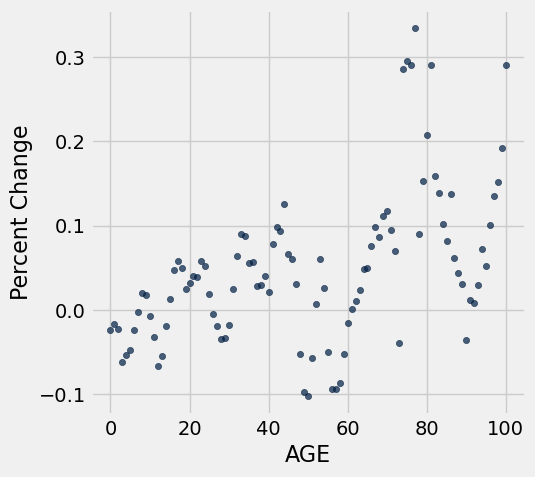

In [48]:
new_tbl.where("SEX", 0).where("AGE", are.below(101)).scatter("AGE", "Percent Change")

### Line Graphs

To start, let's graph the population by age in 2024

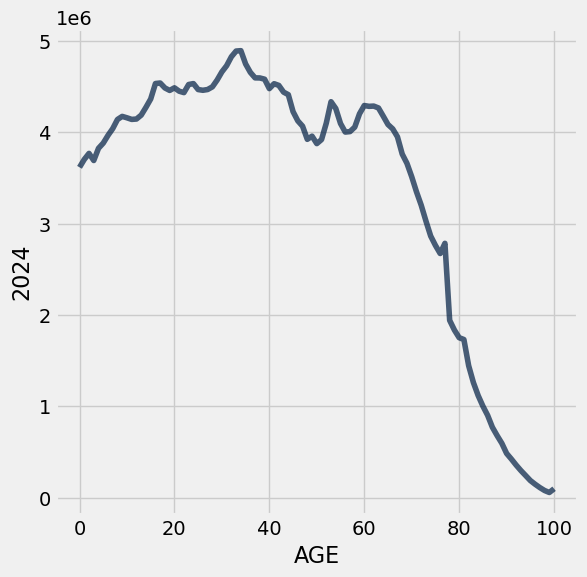

In [46]:
census_2024 = census.where('SEX', 0).select('AGE', '2024').where("AGE", are.below(101))
census_2024.plot("AGE", "2024")

What if we want to see the population for 2020 and 2024?

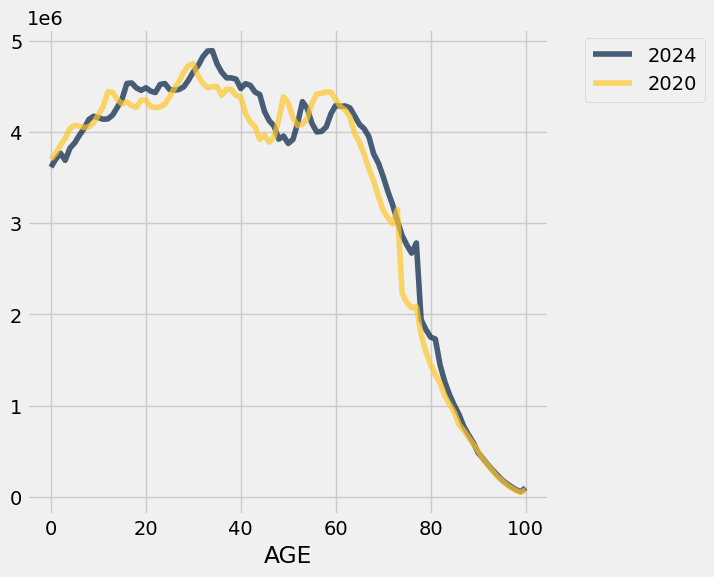

In [47]:
census_2020_2024 = census.where('SEX',0).select('AGE', '2024', '2020').where("AGE", are.below(101))
census_2020_2024.plot("AGE")

### Males and Females in 2024

In [60]:
no_999 = census.where("AGE", are.below(101))
no_999
males24 = no_999.where("SEX", 1).drop("SEX").select("AGE", "2024")
females24 = no_999.where("SEX", 2).drop("SEX").select("AGE", "2024")


In [63]:
malefemale24 = Table().with_columns('Age', males24.column("AGE"), 'Males', males24.column('2024'), 'Females', females24.column('2024'))
malefemale24

Age,Males,Females
0,1846708,1768890
1,1890459,1811365
2,1923421,1844591
3,1886530,1803599
4,1953925,1869826
5,1980962,1899574
6,2026118,1939030
7,2065992,1973535
8,2114905,2024592
9,2131665,2041299


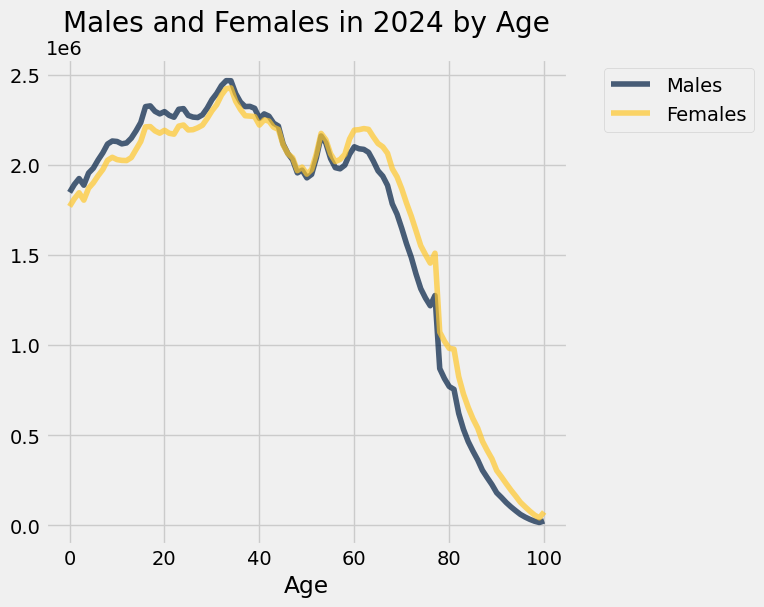

In [67]:
malefemale24.plot('Age')
plots.title('Males and Females in 2024 by Age');